<a href="https://colab.research.google.com/github/rollingthundaa/LGMVIP-October-Data-Science-Intern-/blob/main/Advanced%20Level%20Task%201%20-%20Develop%20A%20Neural%20Network%20That%20Can%20Read%20Handwriting/Advanced_Level_Task_1_Develop_A_Neural_Network_That_Can_Read_Handwriting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Devadyuti Sahoo - Data Science Intern at LetsGrowMore Virtual Internship Program (October-2021)**

# **Advanced Level Task 1 - Develop A Neural Network That Can Read Handwriting**

**Import the required libraries**

In [50]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

**Load the data**

In [51]:
(x_train, y_train) , (x_test, y_test) = keras.datasets.mnist.load_data()

In [53]:
#scale the data
x_train = x_train / 255
x_test = x_test / 255

In [54]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [55]:
x_train[0].shape

(28, 28)

In [56]:
x_train_flat = x_train.reshape(len(x_train), 28*28)
x_test_flat = x_test.reshape(len(x_test), 28*28)

In [57]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_flat, y_train, epochs=30)

Epoch 1/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2757 - accuracy: 0.9220
Epoch 2/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1223 - accuracy: 0.9645
Epoch 3/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0847 - accuracy: 0.9742
Epoch 4/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0651 - accuracy: 0.9811
Epoch 5/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0517 - accuracy: 0.9840
Epoch 6/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0417 - accuracy: 0.9869
Epoch 7/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0345 - accuracy: 0.9891
Epoch 8/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0285 - accuracy: 0.9911
Epoch 9/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0235 - accuracy: 0.9926
Epoch 10/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.020

**Evaluate on test dataset**

In [58]:
model.evaluate(x_test_flat, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1413 - accuracy: 0.9762


[0.1412661373615265, 0.9761999845504761]

**Prediction**

In [59]:
predictions = model.predict(x_test_flat)

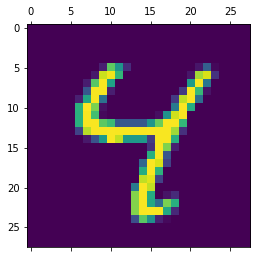

In [60]:
plt.matshow(x_test[6])

In [61]:
predictions[6]

array([1.3240818e-16, 2.7767888e-12, 8.4455515e-12, 4.9252607e-12,
       9.9999976e-01, 1.7618091e-06, 2.0616915e-06, 1.1196434e-03,
       3.0476153e-03, 9.2939466e-01], dtype=float32)

In [62]:
np.argmax(predictions[6])

4

**Generate confusion matrix**

In [64]:
pred_labels = [np.argmax(i) for i in predictions]

In [65]:
conf_matrix = tf.math.confusion_matrix(labels=y_test,predictions=pred_labels)

Text(69.0, 0.5, 'Truth')

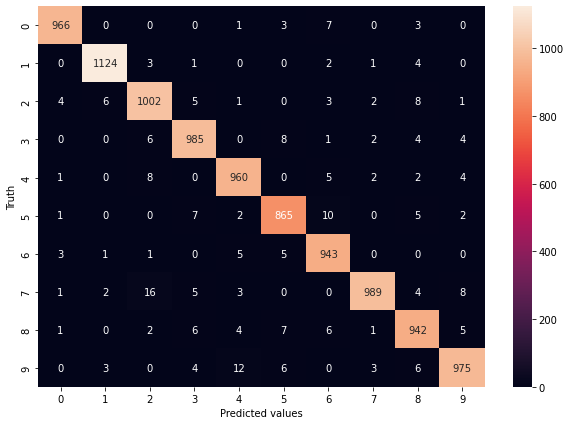

In [66]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted values')
plt.ylabel('Truth')